install abagen

In [1]:
pip install git+https://github.com/rmarkello/abagen.git

  Cloning https://github.com/rmarkello/abagen.git to c:\users\21445\appdata\local\temp\pip-req-build-7_a6j7zp
  Resolved https://github.com/rmarkello/abagen.git to commit dc4a007e4e902e51f97251390c8d1bbf7e58c6d3
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for abagen: filename=abagen-0.1.4+15.gdc4a007-py3-none-any.whl size=3671489 sha256=f595afb06a4f80e293c6008095dc9a5a12995df62c42484ead555d889a46a024
  Stored in directory: C:\Users\21445\AppData\Local\Temp\pip-ephem-wheel-cache-xr8izgi2\wheels\d0\6e\dd\272a28f204083c796b1e9f4ab37e529a9c2493e42ad8c650e2
Successfully built abagen
  Attempting uninstall: abagen
    Found existing installation: abagen 0.1.3
    Uninstalling abagen-0.1.3:
      Successfully uninstalled abagen-0.1.3
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/rmarkello/abagen.git 'C:\Users\21445\AppData\Local\Temp\pip-req-build-7_a6j7zp'


The data supplied by the Allen Human Brain Atlas is quite large—on the order of ~4GB for all six donors. Because loading these datasets into memory can be quite time-consuming, abagen has integrated support for parquet and can do some on-the-fly conversions to speed things up. However, using parquet is completely optional, and therefore support for it is not installed when using the “vanilla” installation procedures.

If you would like to enable parquet support, you will need to install some additional dependencies. This can be done using pip:

In [3]:
import abagen

This command will download data from the specified donors into a folder called microarray in the $HOME/abagen-data directory. If you have already downloaded the data you can provide the data_dir argument to specify where the files have been stored:

Change data_dir to current dir and copy abagen_data folder to current dir to solve error in abagen.get_expression_data:
TypeError: DataFrame.set_axis() got an unexpected keyword argument 'inplace'

In [4]:
files = abagen.fetch_microarray(donors='all', verbose=0, data_dir='D:/Projects/SES_T1/results/annotation/abagen-data/')

In [5]:
print(files.keys())

dict_keys(['9861', '10021', '12876', '14380', '15496', '15697'])


In [6]:
atlas = abagen.fetch_desikan_killiany()

In [8]:
print(atlas['image'])

d:\Applications\anaconda3\envs\nilearn\lib\site-packages\abagen\data\atlas-desikankilliany.nii.gz


In [12]:
print(atlas['info'])

d:\Applications\anaconda3\envs\nilearn\lib\site-packages\abagen\data\atlas-desikankilliany.csv


In [10]:
print(expression)

gene_symbol      A1BG  A1BG-AS1       A2M     A2ML1   A3GALT2    A4GALT   
label                                                                     
1            0.480759  0.688550  0.370086  0.392645  0.360818  0.419254  \
2            0.623995  0.532027  0.519627  0.623731  0.404923  0.412919   
3            0.525373  0.622902  0.519448  0.393459  0.442179  0.550368   
4            0.353714  0.576465  0.474117  0.413741  0.354063  0.441846   
5            0.667755  0.543455  0.606849  0.526906  0.423939  0.467107   
...               ...       ...       ...       ...       ...       ...   
79           0.798694  0.224842  0.826082  0.538833  0.366658  0.598533   
80           0.696748  0.468697  0.534857  0.509453  0.365579  0.309886   
81           0.363747  0.271664  0.469768  0.630534  0.656241  0.585701   
82           0.823845  0.601943  0.334327  0.509475  0.507125  0.200720   
83           0.425415  0.227603  0.634910  0.558285  0.594288  0.525956   

gene_symbol      AAAS   

define ses mediation effect regions:
lh_lateral occipital
middle temporal
precentral
superiortemporal
insula
caudal anterior cingulate
posterior cingulate
rostral anterior cingulate
rh_postcentral
precentral
superior frontal
caudal middle frontal
inferior temporal
superior temporal
insula
right thalamus
right ventralDC not in csv
right hippocampus
right caudate
brain stem

Step 1: Load and Inspect the Atlas Information
Load the atlas information and inspect the structure.

In [13]:
import nibabel as nib
import pandas as pd

dk = nib.load(atlas['image'])
atlas_info = pd.read_csv('D:/Applications/anaconda3/envs/nilearn/Lib/site-packages/abagen/data/atlas-desikankilliany.csv')

print(atlas_info.head())


   id                    label hemisphere structure
0   1                 bankssts          L    cortex
1   2  caudalanteriorcingulate          L    cortex
2   3      caudalmiddlefrontal          L    cortex
3   4                   cuneus          L    cortex
4   5               entorhinal          L    cortex


Step 2: Define Behavior-Correlated Regions
List the behavior-correlated regions using the label and hemisphere. For example:

In [14]:
sesmed = [
    ('lateraloccipital', 'L'),
    ('middletemporal', 'L'),
    ('precentral', 'L'),
    ('superiortemporal', 'L'),
    ('insula', 'L'),
    ('caudalanteriorcingulate', 'L'),
    ('posteriorcingulate', 'L'),
    ('rostralanteriorcingulate', 'L'),
    ('postcentral', 'R'),
    ('precentral', 'R'),
    ('superiorfrontal', 'R'),
    ('caudalmiddlefrontal', 'R'),
    ('inferiortemporal', 'R'),
    ('superiortemporal', 'R'),
    ('insula', 'R'),
    ('thalamusproper', 'R'),
    ('hippocampus', 'R'),
    ('caudate', 'R'),
    ('brainstem', 'B')

]

Step 3: Load the Gene Expression Data
Load the gene expression data using the abagen package and ensure it matches the atlas information.

In [15]:
# Ensure the index matches the atlas info labels and hemispheres
atlas_info.set_index(['label', 'hemisphere'], inplace=True)
expression.index = pd.MultiIndex.from_tuples(atlas_info.index)

Step 4: Extract Gene Expression for Correlated Regions
Extract the gene expression data for the specific behavior-correlated regions.

In [17]:
# Extracting expression data for behavior-correlated regions
sesmed_expression = expression.loc[sesmed]
print(sesmed_expression)

gene_symbol                     A1BG  A1BG-AS1       A2M     A2ML1   A3GALT2   
lateraloccipital         L  0.375673  0.568228  0.490108  0.463670  0.430640  \
middletemporal           L  0.596330  0.677565  0.396459  0.459630  0.402897   
precentral               L  0.422984  0.606412  0.554419  0.464281  0.438001   
superiortemporal         L  0.621483  0.698926  0.416701  0.445005  0.406744   
insula                   L  0.662749  0.690935  0.433926  0.555730  0.443082   
caudalanteriorcingulate  L  0.623995  0.532027  0.519627  0.623731  0.404923   
posteriorcingulate       L  0.480522  0.663844  0.462867  0.540799  0.452143   
rostralanteriorcingulate L  0.589971  0.644639  0.464669  0.442821  0.429580   
postcentral              R  0.465276  0.643041  0.401791  0.492452  0.418852   
precentral               R  0.520534  0.614231  0.479551  0.516994  0.379513   
superiorfrontal          R  0.583800  0.678346  0.408661  0.417958  0.326697   
caudalmiddlefrontal      R  0.569248  0.

Step 5: Rank Genes by Expression
Rank the genes by their expression levels in the behavior-correlated regions.

In [22]:
# Calculate the mean expression across the behavior-correlated regions
mean_expression = sesmed_expression.mean(axis=0)
print(mean_expression.head())
# Get the top 25 genes
top_genes = mean_expression.sort_values(ascending=False).head(25)
print(top_genes)


gene_symbol
A1BG        0.535693
A1BG-AS1    0.563370
A2M         0.480481
A2ML1       0.523718
A3GALT2     0.457852
dtype: float64
gene_symbol
NRGN         0.829529
STX1A        0.804470
ITPKA        0.801722
FOXG1        0.784552
NGEF         0.783793
OLFM1        0.778888
ENC1         0.778765
TMEM155      0.778534
EXOC3L2      0.777720
EPOP         0.770630
CHN1         0.769214
CCK          0.767738
PDE2A        0.765564
CA11         0.761137
KCNMA1       0.758442
GDA          0.756681
RGS4         0.756078
LHX2         0.754924
CREG2        0.748579
KIAA1549L    0.748240
NPTX1        0.748210
LINC02217    0.745097
HSPB3        0.744177
MAL2         0.744042
EPHB6        0.743361
dtype: float64


Step 6: Statistical Validation (Permutation Test)
Perform a permutation test to ensure the observed gene expression patterns are not due to random chance.

In [24]:
import numpy as np

n_permutations = 10000  # Number of permutations
permuted_means = np.zeros((n_permutations, expression.shape[1]))

# Perform permutations
for i in range(n_permutations):
    permuted_regions = [tuple(r) for r in np.random.permutation(atlas_info.index)]
    permuted_expression = expression.loc[permuted_regions[:len(sesmed_expression)]]
    permuted_means[i, :] = permuted_expression.mean(axis=0)

# Calculate p-values
observed_means = mean_expression.values
p_values = np.mean(permuted_means >= observed_means, axis=0)

# Create a DataFrame for the results
results = pd.DataFrame({
    'gene': mean_expression.index,
    'mean_expression': observed_means,
    'p_value': p_values
})

# Filter significant genes (e.g., p-value < 0.05)
significant_genes = results[results['p_value'] < 0.05].sort_values('mean_expression', ascending=False).head(25)
print(significant_genes)

             gene  mean_expression  p_value
14001     TRIM49B         0.623494   0.0402
9171         OPN4         0.587175   0.0380
1640     C6orf201         0.558457   0.0485
8953         NRAP         0.557241   0.0231
2667        CNTN6         0.555606   0.0045
1706        CABP2         0.552687   0.0240
4938        GDF10         0.550793   0.0205
6725   KRTAP5-AS1         0.550081   0.0280
2182         CDH6         0.549619   0.0135
4596         FJX1         0.548380   0.0101
10294        PRB1         0.547709   0.0187
10225     PPP1R17         0.547543   0.0073
15498     ZNF733P         0.547158   0.0362
12255     SLC52A1         0.546925   0.0034
6691    KRTAP10-6         0.541459   0.0338
6713     KRTAP4-1         0.541250   0.0496
3703         DYTN         0.540968   0.0266
11855       SF3A2         0.540451   0.0473
5307        GRIK4         0.539594   0.0181
10968       RDH11         0.538775   0.0058
9891       PLA2G7         0.536790   0.0434
3967         ENO3         0.5362

Step 7: Reporting Results
When reporting your results, it’s essential to include both the expression values and the statistical significance of your findings. You can report the top genes with their mean expression values and corresponding p-values.

try not to select top 25 genes first, do perm to all genes

In [25]:
import numpy as np

n_permutations = 10000  # Number of permutations
permuted_means = np.zeros((n_permutations, expression.shape[1]))

# Perform permutations
for i in range(n_permutations):
    permuted_regions = [tuple(r) for r in np.random.permutation(atlas_info.index)]
    permuted_expression = expression.loc[permuted_regions[:len(sesmed_expression)]]
    permuted_means[i, :] = permuted_expression.mean(axis=0)

# Calculate p-values
observed_means = sesmed_expression.mean(axis=0).values
p_values = np.mean(permuted_means >= observed_means, axis=0)

# Calculate -log(p) for better visualization
log_p_values = -np.log10(p_values)

# Create a DataFrame for the results
results = pd.DataFrame({
    'gene': sesmed_expression.columns,
    'mean_expression': observed_means,
    'p_value': p_values,
    'log_p_value': log_p_values
})

print(results)

In [26]:
print(results)

           gene  mean_expression  p_value  log_p_value
0          A1BG         0.535693   0.3881     0.411056
1      A1BG-AS1         0.563370   0.6650     0.177178
2           A2M         0.480481   0.2184     0.660747
3         A2ML1         0.523718   0.0526     1.279014
4       A3GALT2         0.457852   0.1020     0.991400
...         ...              ...      ...          ...
15628      ZXDC         0.489955   0.3361     0.473531
15629    ZYG11B         0.618639   0.6420     0.192465
15630       ZYX         0.567730   0.6830     0.165579
15631     ZZEF1         0.460814   0.7800     0.107905
15632      ZZZ3         0.490770   0.7539     0.122686

[15633 rows x 4 columns]


Visualize the Results:
Plot the results to visualize the gene expression significance.

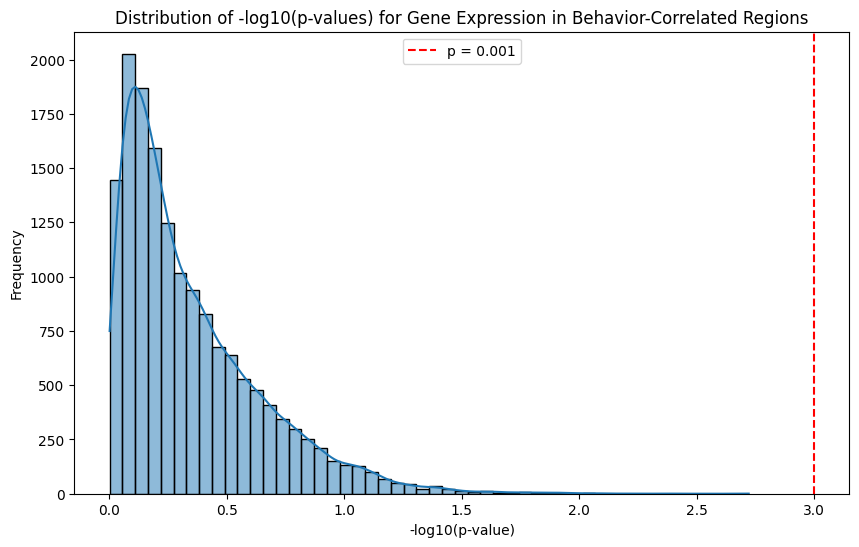

          gene  mean_expression  p_value  log_p_value
1200    BCAP31         0.523076   0.0019     2.721246
12255  SLC52A1         0.546925   0.0039     2.408935
12328     SLPI         0.492018   0.0055     2.259637
10968    RDH11         0.538775   0.0065     2.187087
2667     CNTN6         0.555606   0.0083     2.080922
10225  PPP1R17         0.547543   0.0086     2.065502
12707     SQLE         0.505204   0.0087     2.060481
2701   COL18A1         0.492592   0.0096     2.017729


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot -log(p) values
plt.figure(figsize=(10, 6))
sns.histplot(log_p_values, bins=50, kde=True)
plt.axvline(x=-np.log10(0.001), color='r', linestyle='--', label='p = 0.001')
plt.xlabel('-log10(p-value)')
plt.ylabel('Frequency')
plt.title('Distribution of -log10(p-values) for Gene Expression in Behavior-Correlated Regions')
plt.legend()
plt.show()

# Highlight significant genes (e.g., p-value < 0.001)
significant_genes = results[results['p_value'] < 0.01].sort_values('log_p_value', ascending=False)

# Print significant genes
print(significant_genes)
